<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Артём! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>



---
    
Для лучшей коммуникации будет лучше если ты будешь оставлять ответные комментарий (cвои комментарии к исправлениям, вопросы), так результат будет лучше.  А чтобы ревьюры их не теряли, лучше их подсвечивать цветом (можешь выбрать свой, а можешь использовать   тот который я предложил ниже). И чтобы не возникло путаницы лучше оставлять указание на номер версии комментария по итерация:  

1 итерация

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Привет Марат!.</div>


2 итерация

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>
    
    
И лучше подсвечивать свои комментарии цветом, для этого достаточно в ячейку markdown добавить: 

```html
<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>    

```    
    
Хорошая коммуникация залог успеха! )
    
---

<div class="alert alert-info"> <b>Комментарии студента V1:</b> Привет Марат! =)</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Привет Артем!


 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import torch
import transformers
from tqdm import notebook
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix

# иморты для облака слов
from pymystem3 import Mystem
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# для дообучения модели
from datasets import Dataset
import evaluate

import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка датасета

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv', index_col=0)
display(data.shape)
display(data.head())

(159292, 2)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


В исходном датасете 159292 записей. Возьмем только небольшую часть, иначе может не хватить ресурсов:

In [3]:
RND_SEED = 42
TRAIN_SIZE = 5000 # большой набор может уронить тетрадку и студию даже на локальной машине 

 


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

    
    
    
Совет: 




- стоило еще проверить на сбалансированность классов в таргете это важная информация при моделировании и  корректной оценки модели. и к нему график можно, ведь красивый, хорошо оформленный график может быть украшением проекта. Без учёта дисбаланса  предсказания модели могут быть смещены в сторону более часто встречающегося класса.  Для начала можно посмотреть [тут](https://pudie.ru/articles/707332/)

 
   
   
- когда мы работаем с текстами, describe итп описательные статистике не использовать, но можно провести частотный анализ текста.  Предлагаю для этого использовать [облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встречаемых словах в токсичных и нетоксичных твитах (в облаке уже автоматически будут убраны стоп слова). Кроме того графики, рисунки делают проект визуально интересней
   
   
В тренажере облако импортируем так

    !pip install wordcloud 


или

    !pip install wordcloud==1.8.2.2  


И возможно дополнительно надо будет сделать



    !pip install --upgrade Pillow  (попробуй версию 9.5.0)

или

	font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf'
	WordCloud(...., font_path = font_path,)
     

<div class="alert alert-info"> <b>Комментарии студента V1:</b><br>http://pudie.ru/articles/707332/ не хочет открываться. Говорит "404"<br>Но я примерно понял, о чем ты. Под этим комментом нарисую пирог с классами</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Действительно,  "закрыт Шенген"

### Дисбаланс классов

toxic
0    143106
1     16186
Name: count, dtype: int64

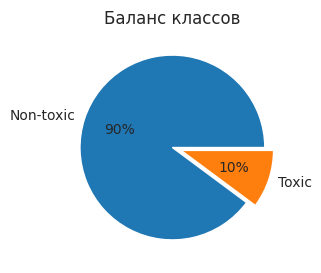

In [4]:
display(data['toxic'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize=(3,3))
plt.pie(x=data['toxic'].value_counts(normalize=True), labels=['Non-toxic', 'Toxic'], autopct='%.0f%%', explode=[0, 0.1]);
plt.title('Баланс классов')
plt.show()

- Получается, у нас сильный дисбаланс целевых классов. Это надо учесть при разделении выборки и при оценке модели.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Хотел бы уточнить что даже если бы у нас сбалансированный dataset всё равно нужно было и   это учитывать с помощью стратификаций. Она разбивает на выборке так, чтобы во всех, соотношение нулей и единичек в таргете было одинаковое, потому что если в тренировочный попадут примеры где нулей - 80%, а в тестовой 60%, то модель может криво обучиться 

<div class="alert alert-info"> <b>Комментарии студента V1:</b><br>Ок. Добавляю облако:</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


 Отлично, но информативнее было разбит на облако для токсичных и не токсичных

<div class="alert alert-info"> <b>Комментарии студента V2:</b><br>
Ок. Учту на будущее
</div>

### Облако слов

Используем CountVectorizer + WordCloud. В CountVectorizer укажем словарь стоп слов и препроцессор, переводящий все в нижний регистр и оставляющий только буквы алфавита.

Возьмем небольшую случайную выборку из корпуса.

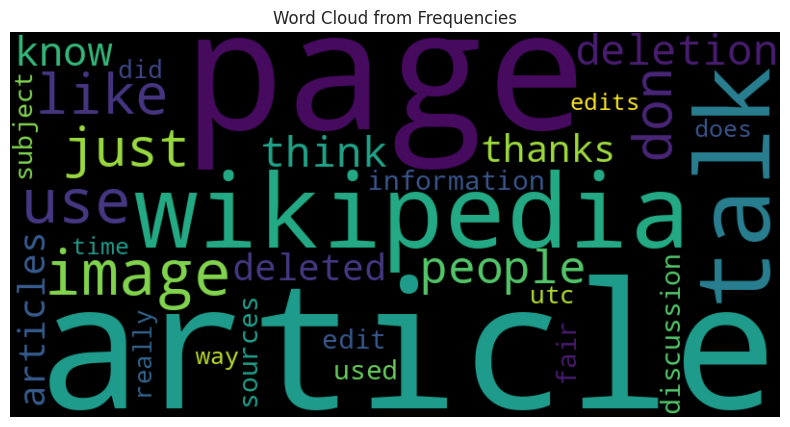

In [5]:
def clear_text(text):
    return ' '.join(re.sub(r'[^a-z]', ' ', text.lower()).split())

vectorizer = CountVectorizer(stop_words='english', preprocessor=clear_text)
freq_matrix = vectorizer.fit_transform(data.sample(n=300, random_state=RND_SEED)['text'])

word_counts = np.array(freq_matrix.sum(axis=0)).flatten()
feature_names = vectorizer.get_feature_names_out()
word_frequencies_dict = dict(zip(feature_names, word_counts))

wordcloud = WordCloud(
    random_state=RND_SEED,
    background_color="black",
    width=800,
    height=400,
    max_words=30
)
wordcloud.fit_words(word_frequencies_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off axis labels and ticks
plt.title("Word Cloud from Frequencies")
plt.show()

- Похоже, не всегда распознает форму слова во множественном числе

### Выборка текстов для работы
Берем только часть из-за ресурсоемкости процесса

In [6]:
data = train_test_split(data, train_size=TRAIN_SIZE, random_state=RND_SEED, stratify=data['toxic'])[0]

 


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


 

Совет: 

 





- обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут




<div class="alert alert-info"> <b>Комментарии студента V1:</b><br>Совсем забыл про баланс классов. Спасибо! Добавил stratify выше</div>

### Загрузка модели
Используем готовую модель *unitary/toxic-bert* 

In [7]:
tokenizer = transformers.AutoTokenizer.from_pretrained("unitary/toxic-bert")
model = transformers.AutoModel.from_pretrained("unitary/toxic-bert")

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



Есть множество предобученных моделей Берт. И выглядит логичным использовать именно toxic-bert для нашего случая. 80% успеха это правильный выбор предобученной модели 
 

### Стемминг
Чтобы сэкономить время и ресурсы еще ограничим длину вектора 80-м процентилем длин полученных векторов.

80-percentile max_len: 124


(5000, 124)

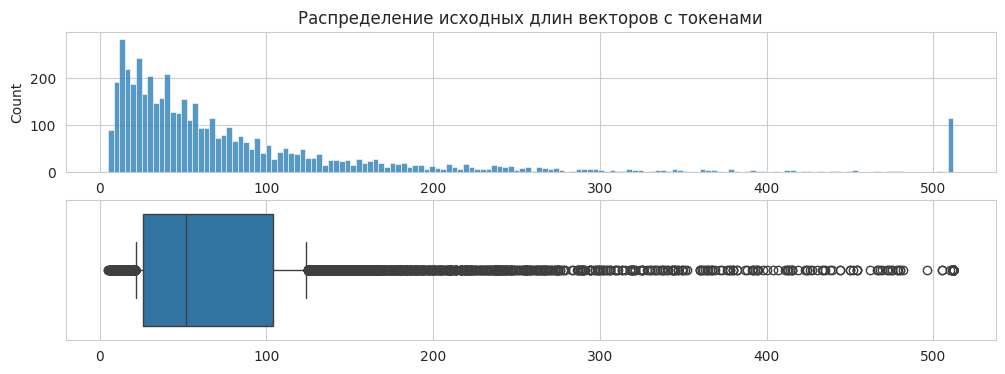

In [8]:
def tokenize(data):
	tokenized = data['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512))

	len_list = []
	for i in tokenized.values:
		len_list.append(len(i))

	max_len = int(np.percentile(len_list, q=80))
	print(f'80-percentile max_len: {max_len}')

	fig, axes = plt.subplots(2, 1)
	fig.set_size_inches(12, 4)
	sns.histplot(data=len_list, bins=150, ax=axes[0]);
	sns.boxplot(data=len_list, whis=[20, 80], ax=axes[1], orient='h');
	axes[0].set_title('Распределение исходных длин векторов с токенами')
	axes[0].sharex(axes[1])

	padded = np.array([i[:max_len] + [0] * max(0, (max_len - len(i))) for i in tokenized.values])
	attention_mask = np.where(padded != 0, 1, 0)

	return padded, attention_mask, max_len

padded, attention_mask, max_len = tokenize(data)
padded.shape

- Идея такого ограничения по max_len в том, что, как видно на графиках, основная часть текстов в данном корпусе выдают кол-во лемм заметно меньше максимального кол-ва, поддерживаемого моделью (512), поэтому, если мы будем формировать матрицу на 512 лемм, в ней будет много бесполезных нулей, что неразумно, т.к. обработка лемм BERT-ом - процесс ресурсоемкий.

Можно еще так получить токены, но возвращаемый BatchEncoding еще надо преобразовать в 2d ndarray, плюс большие набор данных и max_length роняют тетрадку и студию:

padded = tokenizer(data['text'].to_list(), padding=True, truncation=True, max_length=128)

## Обучение

### Способ v.0
#### Embeddings

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = model.to(device) # на всякий случай с присвоением, хотя вроде только для тензоров это надо

Using device: cpu


In [10]:
batch_size = 100
embeddings = []

for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
	batch = torch.LongTensor(padded[batch_size * i : batch_size * (i + 1)]).to(device)
	attention_mask_batch = torch.LongTensor(attention_mask[batch_size * i : batch_size * (i + 1)]).to(device)
	with torch.no_grad():
		batch_embeddings = model(batch, attention_mask=attention_mask_batch)
	embeddings.append(batch_embeddings[0][:, 0, :].numpy())

  0%|          | 0/50 [00:00<?, ?it/s]

 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


    
Для ускорения можно использовать GPU. Это можно сделать в Colab, у меня использование ГПУ ускорило получение эмбедингов раз в 10 - 30
 

Даже если у тебя возможности использовать gpu нет, всё равно можно прописать эту возможность, для тех кто будет работать с твоим кодом

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
Ложим модельку на device
    
    model.to(device)
    
    
По той же схеме ложим данные на   device  
    
    
 

<div class="alert alert-info"> <b>Комментарии студента V1:</b><br>Так? (вторая ячейка вверх)</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

#### Регрессия

In [11]:
features = np.concatenate(embeddings)

X_train, X_test, y_train, y_test = train_test_split(
    features, data['toxic'], test_size=0.2, random_state=RND_SEED, stratify=data['toxic'])
estimator = LogisticRegression(random_state=RND_SEED).fit(X_train, y_train)
scores = cross_val_score(estimator, X_train, y_train, scoring='f1')
print(f'F1 на кроссвалидации: {scores}')

F1 на кроссвалидации: [0.89156627 0.88607595 0.8625     0.8625     0.8969697 ]


#### F1 на тестовой выборке

F1 on test set: 0.91


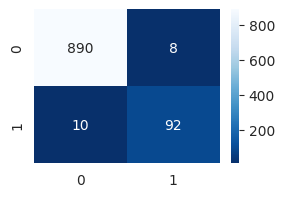

In [12]:
y_pred = estimator.predict(X_test)
print(f'F1 on test set: {f1_score(y_test, y_pred):.02f}')
precision_recall_fscore_support(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues_r');

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 
 

- Если студент получил на тесте f1 выше 0,8, это считается отличным результатом.

 

<div class="alert alert-warning">



Совет: 

 


   

В случае использования Берта   можно попробовать оценить важный слово с помощью библиотеки transformers-interpret
    
    
    from transformers_interpret import SequenceClassificationExplainer
    
    cls_explainer = SequenceClassificationExplainer(model, tokenizer)
    
    word_attributions = cls_explainer(Тут какой-нибудь негативный твит)
    cls_explainer.predicted_class_name
    
    
word_attributions    список кортежей, где каждый кортеж содержит токен (слово или подслово) и его важность (значение SHAP) для предсказания модели. И вот так можно пробежаться по негативным твитам,  и собрать какую-то среднюю статистику по словам которые важны для присваивания  LABEL_1  (Негативный твит)
    
     

<div class="alert alert-info"> <b>Комментарии студента V1:</b><br>Попробовал сделать. Ругается<br>AttributeError: 'BertModel' object has no attribute 'bert'<br>
Если ты не против, в этой работе не буду с этой ошибкой разбираться. Попробую как-нибудь отдельно. Там, есть вероятность, несоответствие версий либ.</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Всё что жёлтым Это по желанию 

In [13]:
#toxic_example = data.loc[y_test[y_test == 1].index[0], 'text']
#print(toxic_example)

#from transformers_interpret import SequenceClassificationExplainer

#cls_explainer = SequenceClassificationExplainer(model, tokenizer) # AttributeError: 'BertModel' object has no attribute 'bert'

#word_attributions = cls_explainer(X_test[y_test[y_test == 1].index[0]])
#cls_explainer.predicted_class_name

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

 
 
    
Есть и другой вариант. Можно потюнить модель Берта,  можешь взять на основу [статью (там вообще все возможные варианты рассмотрены, причём с использованием разных библиотек)](https://habr.com/ru/articles/704592/) или этот [ролик](https://www.youtube.com/watch?v=Z1J3sTJYIcc&list=PLEwK9wdS5g0qksxWxtE5c2KuFkIfUXe3i&index=14), там прямо можно посмотреть процесс кодирования, и получше разобраться в практической релизации Берта (тут реализация сложнее, метрики я видел за 0,8). Если использовать [Trainer](https://pytorch.org/rl/reference/generated/torchrl.trainers.Trainer.html), будет всё гораздо проще. 
    
      

### Способ v.1

In [21]:
RND_SEED = 42
TRAIN_SIZE = 500 # здесь еще меньше придется сделать. на 5000 будет учиться 2.5 часа

Перезагрузим данные на всякий случай

In [22]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv', index_col=0)
data.columns = ['text', 'labels']
data = train_test_split(data, train_size=TRAIN_SIZE, random_state=RND_SEED, stratify=data['labels'])[0]
train, test = train_test_split(data, test_size=0.2, random_state=RND_SEED, stratify=data['labels'])

train = Dataset.from_pandas(train)
test = Dataset.from_pandas(test)

In [23]:
tokenizer = transformers.AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = transformers.AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-uncased")

# Traner вроде бы сам определяет device и переносит на него модель. Т.е. здесь руками переключать вроде бы не надо.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Извлечение токенов
В этом варианте ограничение по длине отличается от предыдущего. Если в первом варианте мы говорили модели вернтуть нам максимальное для нее кол-во токенов (512), потом находили приемлемое органичение длины (80% длин, 124), то здесь мы сразу просим модель вернуть там 124 токена.

In [24]:
max_len = 124

def tokenize_function(data):
	return tokenizer(data['text'], padding='max_length', max_length=max_len, truncation=True)

tokenized_train = train.map(tokenize_function)
tokenized_test = test.map(tokenize_function)

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

#### Тюнинг

In [25]:
training_args = transformers.TrainingArguments(
	eval_strategy = 'epoch',
	per_device_train_batch_size = 4,
	per_device_eval_batch_size = 4,
	num_train_epochs = 5,
	report_to='none'
)

metric = evaluate.load('f1')
def compute_metrics(eval_pred):
	print('eval_pred', eval_pred)
	logits, labels = eval_pred
	predictions = np.argmax(logits, axis=-1)
	return metric.compute(predictions=predictions, references=labels)

trainer = transformers.Trainer(
	model = model,
	args = training_args,
	train_dataset = tokenized_train,
	eval_dataset = tokenized_test,
	compute_metrics = compute_metrics)

trainer.train()

/home/wtom/code/notebooks/practicum/wikishop/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,F1
1,No log,0.363379,0.615385
2,No log,0.299305,0.705882
3,No log,0.378961,0.705882
4,No log,0.383226,0.705882
5,0.114600,0.396347,0.705882


eval_pred <transformers.trainer_utils.EvalPrediction object at 0x78aa40aeb560>


/home/wtom/code/notebooks/practicum/wikishop/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


eval_pred <transformers.trainer_utils.EvalPrediction object at 0x78aa3edac200>


/home/wtom/code/notebooks/practicum/wikishop/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


eval_pred <transformers.trainer_utils.EvalPrediction object at 0x78aa3ed8af30>


/home/wtom/code/notebooks/practicum/wikishop/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


eval_pred <transformers.trainer_utils.EvalPrediction object at 0x78aa3ed56c00>


/home/wtom/code/notebooks/practicum/wikishop/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/home/wtom/code/notebooks/practicum/wikishop/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


eval_pred <transformers.trainer_utils.EvalPrediction object at 0x78aa44b5a870>


TrainOutput(global_step=500, training_loss=0.11457589721679687, metrics={'train_runtime': 946.3644, 'train_samples_per_second': 2.113, 'train_steps_per_second': 0.528, 'total_flos': 127444417440000.0, 'train_loss': 0.11457589721679687, 'epoch': 5.0})

<div class="alert alert-info"> <b>Комментарии студента V1:</b><br>
Попробовал использовать Trainer. Запутался: не могу понять, как решить проблему с несовпадением набора классов таргета. В модели их 6, у нас 2. Причем модель, похоже, возвращает их как вектор из 6 значений различных видов токсичности, а у нас одно значение - нормально/токсично. В итоге где-то, похоже, на этапе расчета метрики возникает такая ошибка:<br><br>
ValueError: Target size (torch.Size([4])) must be the same as input size (torch.Size([4, 6]))<br><br>
Как лучше посчитать F1, имея 6 выходов у модели и 1 таргет? Можно развернуть таргет в 6 одинаковых полей, что, наверное, будет комфортно для модели, можно наоборот, взять сумму (или сдреднее) 6-ти выходов модели, но как лучше это сделать? Соответствующий код себе пока не очень хорошо представляю, и что ест metric.compute, тоже.<br>
И не возникнет ли дальше проблем, даже если решить эту?
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Есть вариант добавить в самый конец добавить последний линейный слой который будет принимать шесть классов а выдавать два. Но проще использовать модель которая выдаёт два класса, например   bert-base

<div class="alert alert-info"> <b>Комментарии студента V2:</b><br>
Попробовал google-bert/bert-base-uncased. Вроде процесс пошел =) Но пришлось еще в 10 урезать выборку, на 5000 обучалось бы 2.5 часа. F1 получился 0.70, т.е. здесь хуже, чем требуется, видимо, надо подкручивать параметры, или выборку увеличивать - 500 сэмплов, это примерно 50 токсичных сэмплов - мало. Здесь уже, наверное, не вариант делать, но процесс я прочувствовал, буду знать ) Спасибо!
</div>

### Pipeline
Просто посмотреть, что выдает модель на нескольких примерах

<div class="alert alert-info"> <b>Комментарии студента V2:</b><br>
О. Можно же свою модель сюда подставить:
</div>

In [26]:
from transformers import pipeline

clf = pipeline(
    task = 'sentiment-analysis', 
    model = model,
	tokenizer = tokenizer)
#    model = 'unitary/toxic-bert',
#	tokenizer = 'unitary/toxic-bert')

text = data.sample(3, random_state=77)['text'].to_list()
print('\n'.join(text))
clf(text, top_k=None)

Device set to use cpu


"

 You are very welcome Mila. By the way you (or we) could perhaps also place a copy of that image on the page Polyceridae ( a fmaily of nudibranchs) because that species ... Triopha catalinae J. G. Cooper, 1863 sea-clown triopha ... is listed there since it belongs to that family. Since the species name Triopha catalinae is linked to a non-existent page, we could even (if we felt like it to) start a new page for that species. (By the way, in English the word nudibranchs is spelled without the ""e"".) I did try to look up your images on Bill's site, but I was not able to get to the exact page on a lot of them. just a list and at the present time  I did not take the time to try to track it down any further. Maybe I will do that later.   "
"

ROFL, I just saw this page and was about to post this same thing but you already said it. I've never heard it called ""CM"". Maybe it's a British thing.  "
ah good - swing on, in that case!


[[{'label': 'LABEL_0', 'score': 0.9999033212661743},
  {'label': 'LABEL_1', 'score': 9.672428132034838e-05}],
 [{'label': 'LABEL_0', 'score': 0.9998617172241211},
  {'label': 'LABEL_1', 'score': 0.00013825579662807286}],
 [{'label': 'LABEL_0', 'score': 0.9998899698257446},
  {'label': 'LABEL_1', 'score': 0.00010997593199135736}]]

## Выводы

- Получили датасет toxic_comments
- Чтобы хватило ресурсов, взяли небольшую случайную часть сета в работу (5000 текстов)
- Использовали готовую модель unitary/toxic-bert
- Длину векторов лемм ограничили 80%-ным процентилем длин (~128 лемм)
- Обучили модель логистической регрессии, получили метрику F1 на тестовой выборке, удовлетворяющую условию задачи.


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Артём, у тебя старательно выполненная работа, все четко, осмысленно. Здорово Что использовал продвинутый подход с Бертом

 



Ошибок нет но можешь попробовать:



-  по-другому использовать Берт 
    

- для красивой  визуализации можешь построить облако для токсичных и нетоксичных комментариев

 





Посылаю на вторую итерацию, чтобы ответить на вопросы если они появятся, на связи
    



 

<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 


Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .

Если нравится смотреть и слушать то есть целый курс на Ютубе https://www.youtube.com/watch?v=qDMwIQRQt-M&list=PLEwK9wdS5g0qksxWxtE5c2KuFkIfUXe3i&index=1



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

 
     
Постарался ответить на твои вопросы.     
 
Давай на всякий случай отправлю ещё на одну итерацию если вдруг ты решишь что-то доделать (второй вариант Берта). А если нет, то присылай мне обратно, буду сразу принимать    

<div class="alert alert-info"> <b>Комментарии студента V2:</b><br>
Марат, благодарю. Много полезного подсказал. Буду иметь в виду. Дообучение у меня по f1 порог не преодолело, но хотя бы процесс более понятным стал. Спасибо!
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны